In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 显示中文
from set_font import set_chinese_font
custom_font_path = 'Times_SimSun.ttf'
set_chinese_font(custom_font_path)

## 预处理

In [2]:
df = pd.read_csv('data/temp.csv')

In [3]:
df

,品牌,车名,图片链接,月销量,价格,生产商,排名,车型,能源类型,发售日期,保修年限
0,特斯拉,Model Y,https://p9-dcd.byteimg.com/img/tos-cn-i-dcdx/6...,47917,"[24.99, 35.49]",特斯拉中国,1,中型SUV,纯电动,2024.02,4年或8万公里
1,比亚迪,秦PLUS DM-i,https://p9-dcd.byteimg.com/img/tos-cn-i-dcdx/b...,31016,"[7.98, 12.58]",比亚迪,2,紧凑型车,插电式混合动力,2024.02,6年或15万公里
2,日产,轩逸,https://p9-dcd.byteimg.com/img/tos-cn-i-dcdx/f...,29674,"[6.98, 14.49]",东风日产,3,紧凑型车,汽油,2024.01,3年或10万公里
3,比亚迪,海鸥,https://p9-dcd.byteimg.com/img/tos-cn-i-dcdx/a...,27866,"[6.98, 8.58]",比亚迪,4,小型车,纯电动,2024.03,6年或15万公里
4,比亚迪,宋Pro DM-i,https://p3-dcd.byteimg.com/img/tos-cn-i-dcdx/9...,27446,"[10.98, 13.98]",比亚迪,5,紧凑型SUV,插电式混合动力,2024.03,6年或15万公里
...,...,...,...,...,...,...,...,...,...,...,...
504,日产,楼兰,https://p3-dcd.byteimg.com/img/tos-cn-i-dcdx/6...,1,"[18.88, 23.38]",东风日产,564,中型SUV,汽油,2020.08,3年或10万公里
505,起亚,索奈,https://p9-dcd.byteimg.com/img/tos-cn-i-dcdx/f...,1,"[9.18, 10.08]",起亚,565,小型SUV,汽油,2024.04,3年或10万公里
506,现代,名图,https://p9-dcd.byteimg.com/img/motor-mis-img/7...,1,"[12.98, 16.48]",北京现代,566,中型车,汽油,2021.03,可选:[3年或15万公里] [5年或10万公里] [7年或7万公里]
507,DS,DS 7,https://p9-dcd.byteimg.com/img/motor-mis-img/e...,1,"[24.99, 32.99]",DS汽车,567,紧凑型SUV,汽油,2022.11,3年或10万公里


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   品牌      509 non-null    object 
 1   车名      509 non-null    object 
 2   图片链接    509 non-null    object 
 3   月销量     509 non-null    int64  
 4   价格      509 non-null    object 
 5   生产商     509 non-null    object 
 6   排名      509 non-null    int64  
 7   车型      509 non-null    object 
 8   能源类型    509 non-null    object 
 9   发售日期    509 non-null    float64
 10  保修年限    509 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 43.9+ KB


In [5]:
df['价格'] = df['价格'].str.replace('[','')
df['价格'] = df['价格'].str.replace(']','')

In [6]:
def get_high_and_low(row):
    # 增加对数据格式的检查和异常处理
    try:
        s = row.split(',')
        # 确保分割后至少有2个元素，否则用None填充
        if len(s) >= 2:
            return s[0], s[1]
        else:
            return row, None  # 或者返回其他默认值，如0，取决于实际情况
    except Exception as e:
        print(f"Error processing row '{row}': {e}")
        return None, None  # 处理异常时的返回值

In [7]:
df[['低价','高价']] = df['价格'].apply(lambda x: pd.Series(get_high_and_low(x)))  # 提取高低两个价格
 # 提取年
df['发售日期'] = df['发售日期'].astype('str')
df['年份'] = df['发售日期'].apply(lambda x: x.split('.')[0]) 

In [8]:
df[df['保修年限'].str.contains('选')]

,品牌,车名,图片链接,月销量,价格,生产商,排名,车型,能源类型,发售日期,保修年限,低价,高价,年份
163,现代,途胜,https://p3-dcd.byteimg.com/img/tos-cn-i-dcdx/f...,2555,"12.58, 19.18",北京现代,171,紧凑型SUV,汽油,2022.11,可选:3年或15万公里/5年或10万公里/7年或7万公里,12.58,19.18,2022
369,现代,索纳塔,https://p3-dcd.byteimg.com/img/tos-cn-i-dcdx/9...,361,"13.28, 17.98",北京现代,405,中型车,汽油,2024.03,可选：3年或15万公里/5年或10万公里/7年或7万公里,13.28,17.98,2024
450,起亚,起亚K5,https://p3-dcd.byteimg.com/img/motor-mis-img/b...,97,"12.78, 17.18",起亚,498,中型车,汽油,2021.08,可选:[3年或15万公里] [5年或10万公里] [7年或7万公里],12.78,17.18,2021
506,现代,名图,https://p9-dcd.byteimg.com/img/motor-mis-img/7...,1,"12.98, 16.48",北京现代,566,中型车,汽油,2021.03,可选:[3年或15万公里] [5年或10万公里] [7年或7万公里],12.98,16.48,2021


In [9]:
df = df[~df['保修年限'].str.contains('选')].copy().reset_index(drop=True)

In [10]:
def get_fix(row):
    # 增加对数据格式的检查和异常处理
    try:
        s = row.split('年')
        year = s[0]
        if '不限里程' in s[1] or '不限公里' in s[1]:
            km = 999
        else:
            pattern = re.compile(r'\d+')
            km = pattern.findall(s[1])[0]
        return year, km
    except Exception as e:
        print(f"Error processing row '{row}': {e}")
        return None, None  # 处理异常时的返回值

In [11]:
df[['保修年','保修里程']] = df['保修年限'].apply(lambda x: pd.Series(get_fix(x)))

Error processing row '待公布': list index out of range


In [12]:
df['低价'] = pd.to_numeric(df['低价'])
df['高价'] = pd.to_numeric(df['高价'])

In [13]:
df

,品牌,车名,图片链接,月销量,价格,生产商,排名,车型,能源类型,发售日期,保修年限,低价,高价,年份,保修年,保修里程
0,特斯拉,Model Y,https://p9-dcd.byteimg.com/img/tos-cn-i-dcdx/6...,47917,"24.99, 35.49",特斯拉中国,1,中型SUV,纯电动,2024.02,4年或8万公里,24.99,35.49,2024,4,8
1,比亚迪,秦PLUS DM-i,https://p9-dcd.byteimg.com/img/tos-cn-i-dcdx/b...,31016,"7.98, 12.58",比亚迪,2,紧凑型车,插电式混合动力,2024.02,6年或15万公里,7.98,12.58,2024,6,15
2,日产,轩逸,https://p9-dcd.byteimg.com/img/tos-cn-i-dcdx/f...,29674,"6.98, 14.49",东风日产,3,紧凑型车,汽油,2024.01,3年或10万公里,6.98,14.49,2024,3,10
3,比亚迪,海鸥,https://p9-dcd.byteimg.com/img/tos-cn-i-dcdx/a...,27866,"6.98, 8.58",比亚迪,4,小型车,纯电动,2024.03,6年或15万公里,6.98,8.58,2024,6,15
4,比亚迪,宋Pro DM-i,https://p3-dcd.byteimg.com/img/tos-cn-i-dcdx/9...,27446,"10.98, 13.98",比亚迪,5,紧凑型SUV,插电式混合动力,2024.03,6年或15万公里,10.98,13.98,2024,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,合创汽车,合创007,https://p9-dcd.byteimg.com/img/motor-mis-img/0...,1,"29.98, 29.98",合创汽车,563,中型SUV,纯电动,2021.05,5年不限公里,29.98,29.98,2021,5,999
501,日产,楼兰,https://p3-dcd.byteimg.com/img/tos-cn-i-dcdx/6...,1,"18.88, 23.38",东风日产,564,中型SUV,汽油,2020.08,3年或10万公里,18.88,23.38,2020,3,10
502,起亚,索奈,https://p9-dcd.byteimg.com/img/tos-cn-i-dcdx/f...,1,"9.18, 10.08",起亚,565,小型SUV,汽油,2024.04,3年或10万公里,9.18,10.08,2024,3,10
503,DS,DS 7,https://p9-dcd.byteimg.com/img/motor-mis-img/e...,1,"24.99, 32.99",DS汽车,567,紧凑型SUV,汽油,2022.11,3年或10万公里,24.99,32.99,2022,3,10


## 下载照片

In [14]:
import requests
import os

In [15]:
df.sort_values('月销量', ascending=False).head(3)[['图片链接','车名']]

,图片链接,车名
0,https://p9-dcd.byteimg.com/img/tos-cn-i-dcdx/6...,Model Y
1,https://p9-dcd.byteimg.com/img/tos-cn-i-dcdx/b...,秦PLUS DM-i
2,https://p9-dcd.byteimg.com/img/tos-cn-i-dcdx/f...,轩逸


In [16]:
top_cars = df.sort_values('月销量', ascending=False).head(3)[['图片链接', '车名']]

save_dir = 'car_fig'
if not os.path.exists(save_dir):  # 不存在文件夹就创建
    os.makedirs(save_dir)

# 下载照片
for _, (url, car_name) in top_cars.iterrows():
    # 存储路径
    filename = os.path.join(save_dir, f'image_{car_name}.jpg')
    response = requests.get(url)
    # 检查网页状态
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"Image {car_name} downloaded successfully.")
    else:
        print(f"Failed to download image {car_name}. Status code: {response.status_code}")

Image Model Y downloaded successfully.
Image 秦PLUS DM-i downloaded successfully.
Image 轩逸 downloaded successfully.


## 可视化

<Axes: xlabel='月销量', ylabel='车名'>

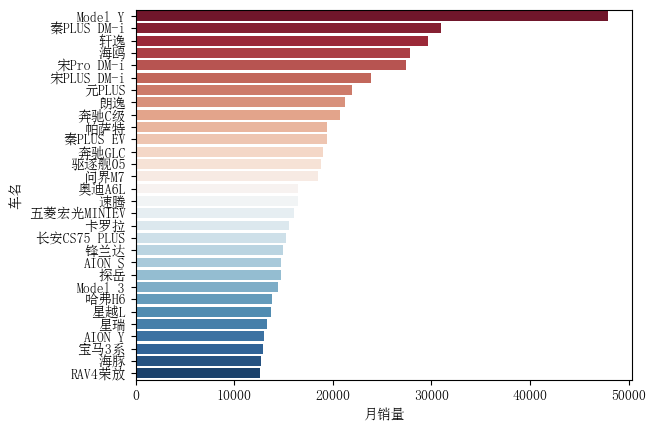

In [17]:
sns.barplot(df.sort_values('月销量', ascending=False).head(30),
            y='车名',
            x='月销量',
            hue='车名',
            palette='RdBu')

<Axes: xlabel='月销量', ylabel='生产商'>

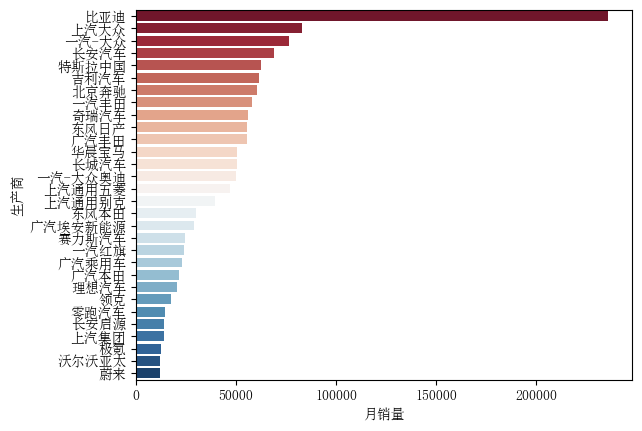

In [18]:
sns.barplot(df.groupby('生产商').agg({'月销量':'sum'}).reset_index().sort_values('月销量', ascending=False).head(30),
            y='生产商',
            x='月销量',
            hue='生产商',
            palette='RdBu')

<Axes: xlabel='年份'>

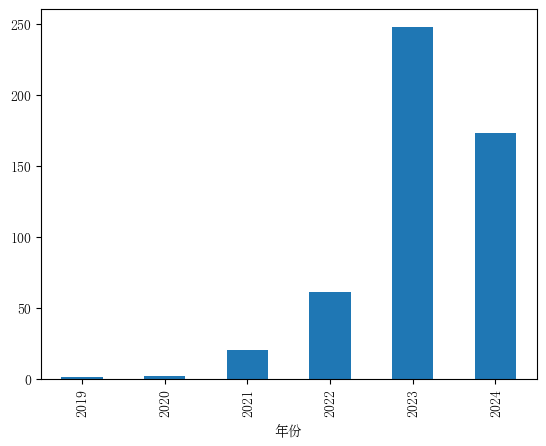

In [19]:
df.groupby('年份').size().plot(kind='bar')

<Axes: xlabel='能源类型'>

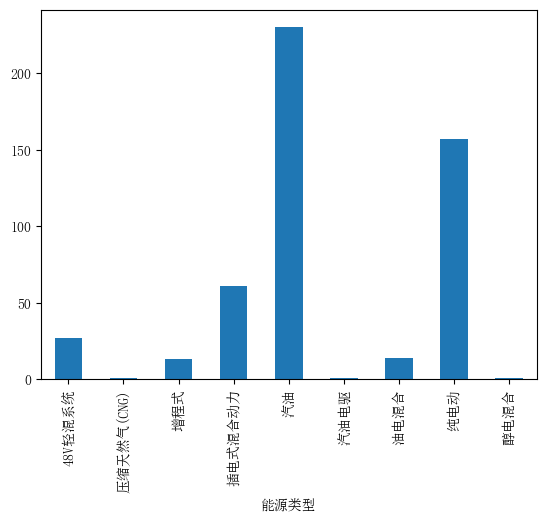

In [20]:
df.groupby('能源类型').size().plot(kind='bar')

<Axes: xlabel='车型'>

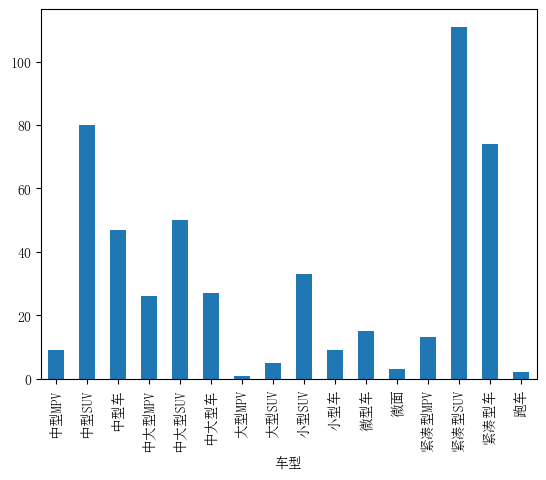

In [21]:
df.groupby('车型').size().plot(kind='bar')

<Axes: xlabel='保修里程'>

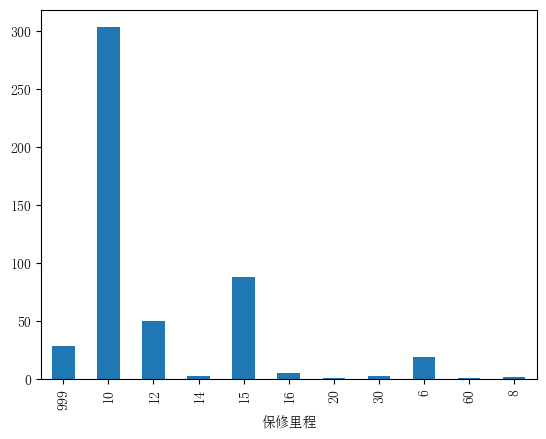

In [22]:
df.groupby('保修里程').size().plot(kind='bar')

<Axes: xlabel='保修年'>

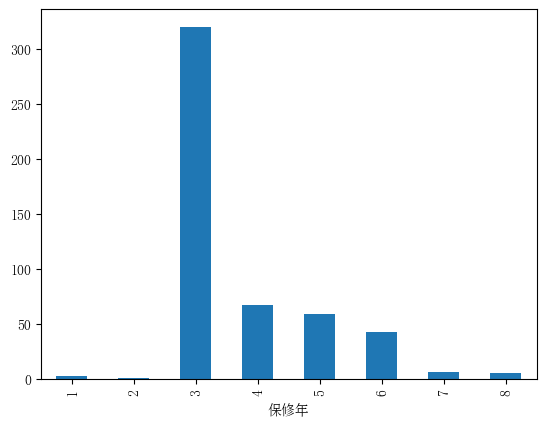

In [23]:
df.groupby('保修年').size().plot(kind='bar')

<Axes: ylabel='低价'>

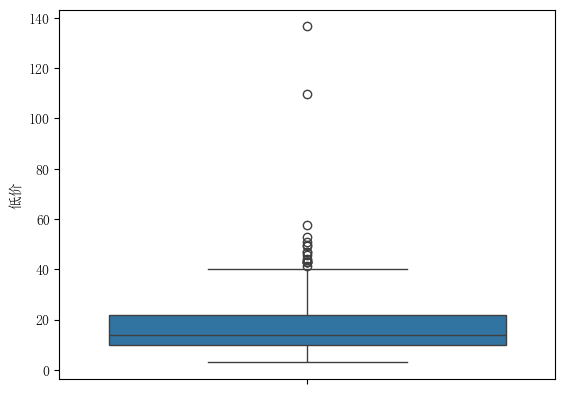

In [24]:
sns.boxplot(df['低价'])

<Axes: ylabel='高价'>

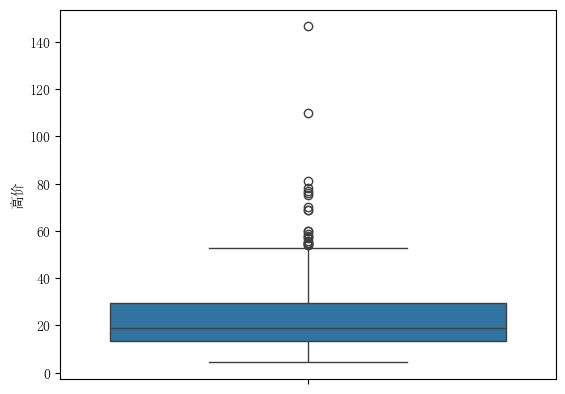

In [25]:
sns.boxplot(df['高价'])

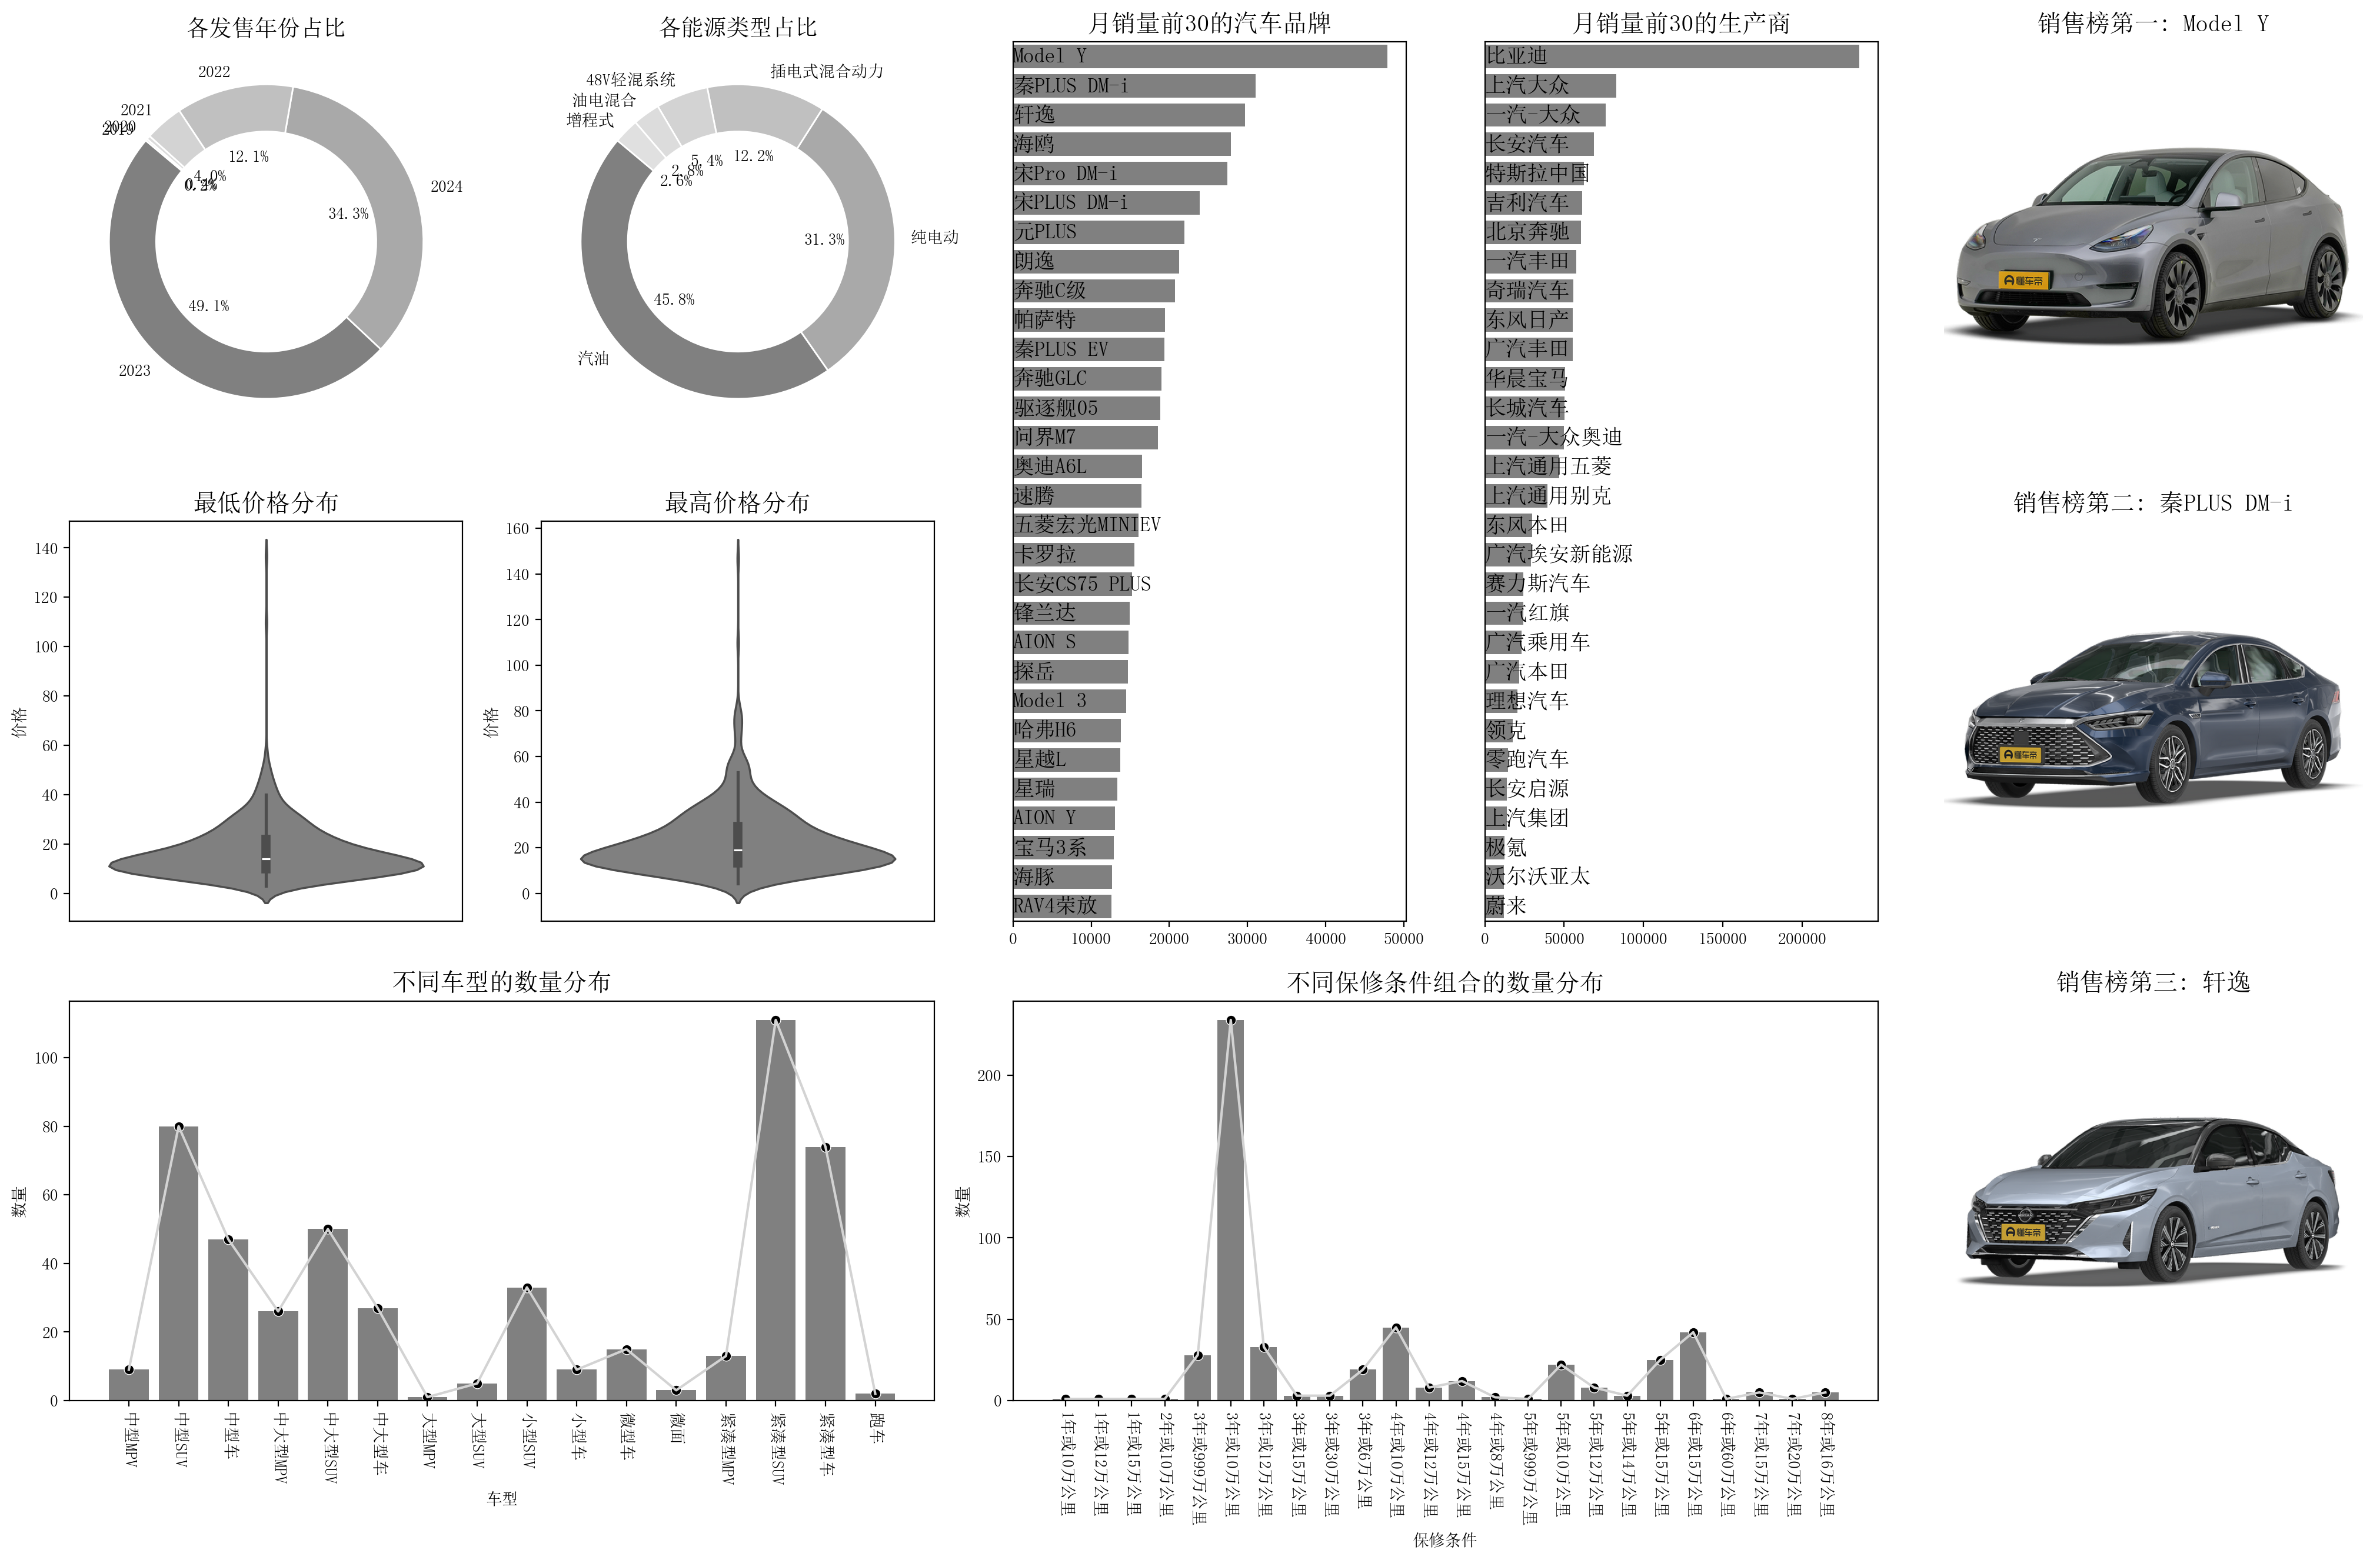

In [26]:
fig = plt.figure(figsize=(25, 15), dpi=200)

ax1 = plt.subplot2grid((3, 5), (0, 0))
ax2 = plt.subplot2grid((3, 5), (0, 1))
ax3 = plt.subplot2grid((3, 5), (0, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 5), (0, 3), rowspan=2)
ax5 = plt.subplot2grid((3, 5), (1, 0))
ax6 = plt.subplot2grid((3, 5), (1, 1))
ax7 = plt.subplot2grid((3, 5), (2, 0), colspan=2)
ax8 = plt.subplot2grid((3, 5), (2, 2), colspan=2)
ax9 = plt.subplot2grid((3, 5), (0, 4))
ax10 = plt.subplot2grid((3, 5), (1, 4))
ax11 = plt.subplot2grid((3, 5), (2, 4))

# 饼状
df0 = df.groupby('年份').size().reset_index(name='count')
colors = ['#808080', '#A9A9A9', '#C0C0C0', '#D3D3D3', '#DCDCDC', '#E0E0E0']
df2 = df0.sort_values('count', ascending=False)
ax1.pie(df2['count'], labels=df2['年份'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3, edgecolor='w'), pctdistance=0.55, colors=colors)
ax1.set_title('各发售年份占比', fontsize=14)

# 饼状
df0 = df.groupby('能源类型').size().reset_index(name='count')
colors = ['#808080', '#A9A9A9', '#C0C0C0', '#D3D3D3', '#DCDCDC', '#E0E0E0']
df2 = df0.sort_values('count', ascending=False).head(6)
ax2.pie(df2['count'], labels=df2['能源类型'], autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3, edgecolor='w'), pctdistance=0.55, colors=colors)
ax2.set_title('各能源类型占比', fontsize=14)

# 箱线图
sns.violinplot(df['低价'], color='grey', ax=ax5)
ax5.set_ylabel('价格')
ax5.set_xticks([])
ax5.set_title('最低价格分布', fontsize=15)
sns.violinplot(df['高价'], color='grey', ax=ax6)
ax6.set_ylabel('价格')
ax6.set_xticks([])
ax6.set_title('最高价格分布', fontsize=15)

# 排名
sns.barplot(df.sort_values('月销量', ascending=False).head(30),
            y='车名',
            x='月销量',
            color='grey',
            ax=ax3)
ax3.set_title('月销量前30的汽车品牌', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('')
# 获取x轴刻度位置和标签
ticks = ax3.get_yticks()
tick_labels = ax3.get_yticklabels()
# 绘制刻度标签
for i, (tick, label) in enumerate(zip(ticks, tick_labels)):
    ax3.text(10, tick, label.get_text(), va='center', ha='left', fontsize=13)
ax3.set_yticks([])

# 排名
sns.barplot(df.groupby('生产商').agg({'月销量':'sum'}).reset_index().sort_values('月销量', ascending=False).head(30),
            y='生产商',
            x='月销量',
            color='grey',
            ax=ax4)
ax4.set_title('月销量前30的生产商', fontsize=15)
ax4.set_xlabel('')
ax4.set_ylabel('')
# 获取x轴刻度位置和标签
ticks = ax4.get_yticks()
tick_labels = ax4.get_yticklabels()
# 绘制刻度标签
for i, (tick, label) in enumerate(zip(ticks, tick_labels)):
    ax4.text(10, tick, label.get_text(), va='center', ha='left', fontsize=13)
ax4.set_yticks([])

# 柱状图
df0 = df.groupby('车型').size().reset_index(name='count')
sns.barplot(df0, x='车型', y='count', color='grey', ax=ax7)
sns.lineplot(df0, x='车型', y='count', color=colors[3], ax=ax7)
sns.scatterplot(df0, x='车型', y='count', color='k', ax=ax7)
ax7.set_ylabel('数量')
xticks = range(len(df0['车型']))  # 获取当前刻度位置
# 设置刻度标签并旋转
ax7.set_xticks(xticks)
ax7.set_xticklabels(df0['车型'], rotation=270)
ax7.set_title('不同车型的数量分布', fontsize=15)

# 柱状图
df0 = df.groupby(['保修年','保修里程']).size().reset_index(name='count')
df0['保修条件'] = df0['保修年'].astype(str) + '年或' + df0['保修里程'].astype(str)+'万公里'
sns.barplot(df0, x='保修条件', y='count', color='grey', ax=ax8)
sns.lineplot(df0, x='保修条件', y='count', color=colors[3], ax=ax8)
sns.scatterplot(df0, x='保修条件', y='count', color='k', ax=ax8)
ax8.set_ylabel('数量')
xticks = range(len(df0['保修条件']))  # 获取当前刻度位置
# 设置刻度标签并旋转
ax8.set_xticks(xticks)
ax8.set_xticklabels(df0['保修条件'], rotation=270)
ax8.set_title('不同保修条件组合的数量分布', fontsize=15)

# 车照片
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

img_path = 'car_fig'
car_fig = [dir_ for dir_ in os.listdir('car_fig') if dir_.endswith('.jpg')]
img = plt.imread(os.path.join(img_path,car_fig[0]))
imagebox = OffsetImage(img, zoom=0.4)
ab = AnnotationBbox(imagebox, (0.5, 0.5), frameon=False, xycoords='axes fraction')
ax9.add_artist(ab)
car_name = car_fig[0].split('_')[1][:-4]
ax9.set_title(f'销售榜第一: {car_name}', fontsize=15)
ax9.axis('off')  # 关闭坐标轴

img = plt.imread(os.path.join(img_path,car_fig[1]))
imagebox = OffsetImage(img, zoom=0.4)
ab = AnnotationBbox(imagebox, (0.5, 0.5), frameon=False, xycoords='axes fraction')
ax10.add_artist(ab)
car_name = car_fig[1].split('_')[1][:-4]
ax10.set_title(f'销售榜第二: {car_name}', fontsize=15)
ax10.axis('off')  # 关闭坐标轴

img = plt.imread(os.path.join(img_path,car_fig[2]))
imagebox = OffsetImage(img, zoom=0.4)
ab = AnnotationBbox(imagebox, (0.5, 0.5), frameon=False, xycoords='axes fraction')
ax11.add_artist(ab)
car_name = car_fig[2].split('_')[1][:-4]
ax11.set_title(f'销售榜第三: {car_name}', fontsize=15)
ax11.axis('off')  # 关闭坐标轴

# plt.tight_layout()  # 调整子图布局以防止重叠
plt.show()